In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns

In [171]:
df=pd.read_csv('Walmart_Store_sales.csv')

In [172]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [173]:
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [174]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [175]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [176]:
df.shape

(6435, 11)

# 1. Which store has maximum sales

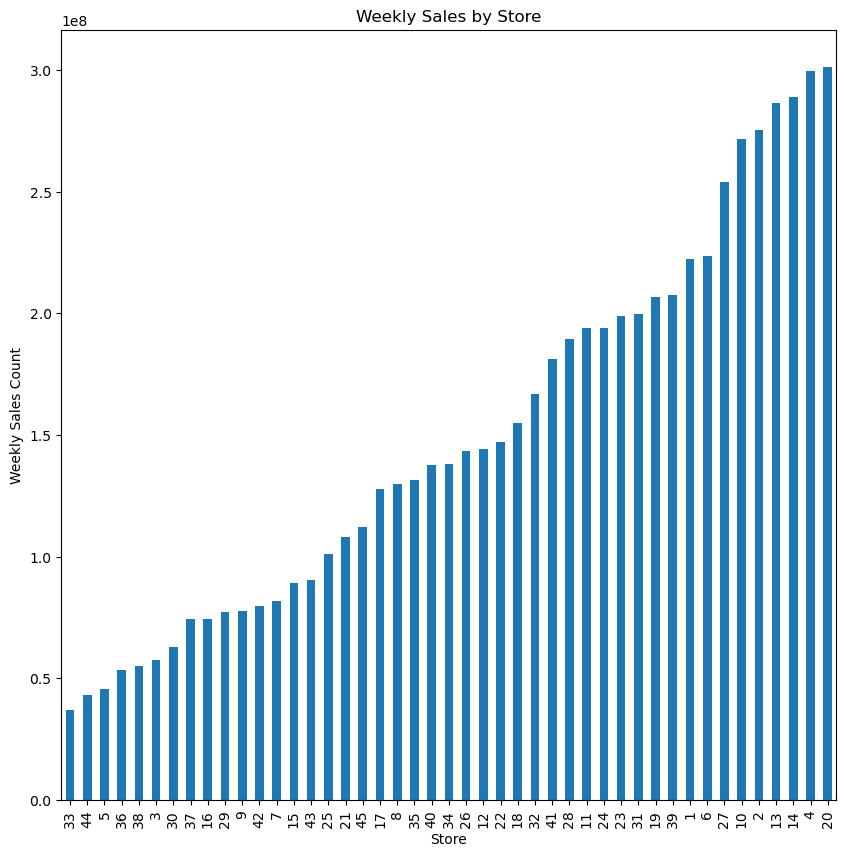

In [177]:
maximumsales = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
plt.figure(figsize=(10,10))
maximumsales.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Weekly Sales Count')
plt.title('Weekly Sales by Store')
plt.show()

In [178]:
df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(1)

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

# 2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [179]:
maxstd = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).head(1))

In [180]:
maxstd

,Weekly_Sales
Store,
14,317569.949476


In [181]:
co_mean = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())

In [182]:
co_mean = co_mean.rename(columns={'Weekly_Sales':'Coefficient of mean'})
co_mean.sort_values(by='Coefficient of mean',ascending=False)

,Coefficient of mean
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613
16,0.165181
18,0.162845


# 3. Which stores has good quarterly growth rate in Q3’2012

In [183]:
Q2 = df[(df['Date'] >= '2012-04-01') & (df['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q3 = df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

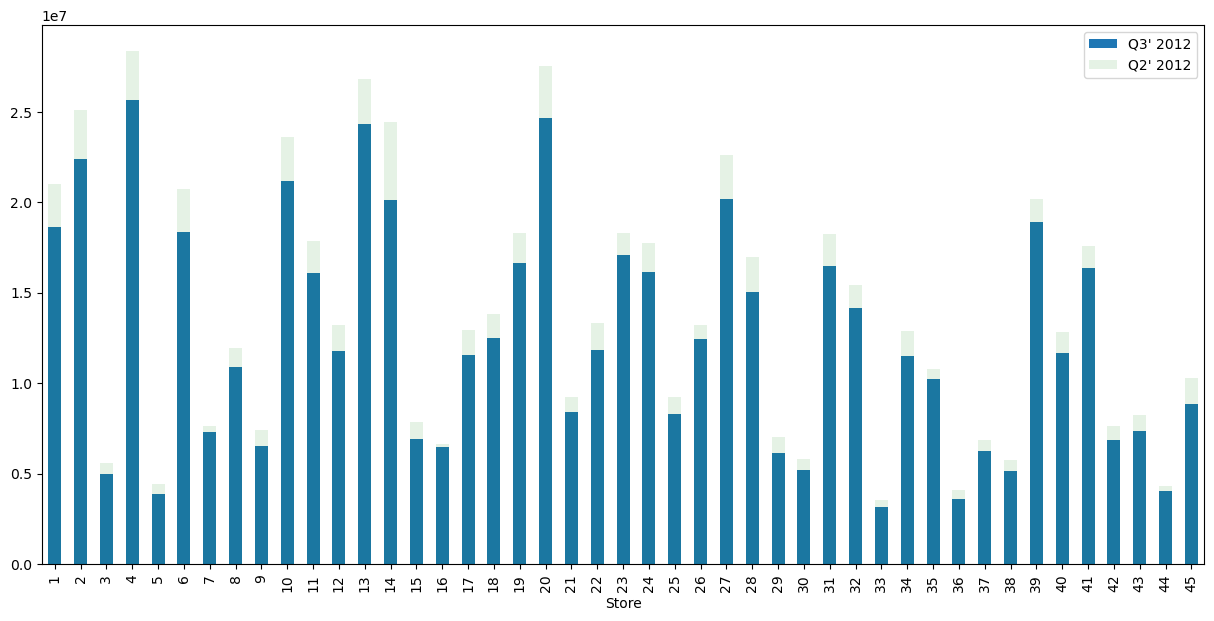

In [184]:
plt.figure(figsize=(15,7))
Q2.plot(x=Q3.plot(kind ='bar'),kind='bar',color='g',alpha=0.1,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

### From the above graph, Store 4 has good quarterly growth rate in Q3’2012

# 4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

### Holiday Events

#### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
#### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
#### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
#### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [185]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [186]:
Super_Bowl_Sales = (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()

In [187]:
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551)

In [188]:
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088564

### Thank Giving has the highest sales

# 5. Provide a monthly and semester view of sales in units and give insights

In [189]:
df['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

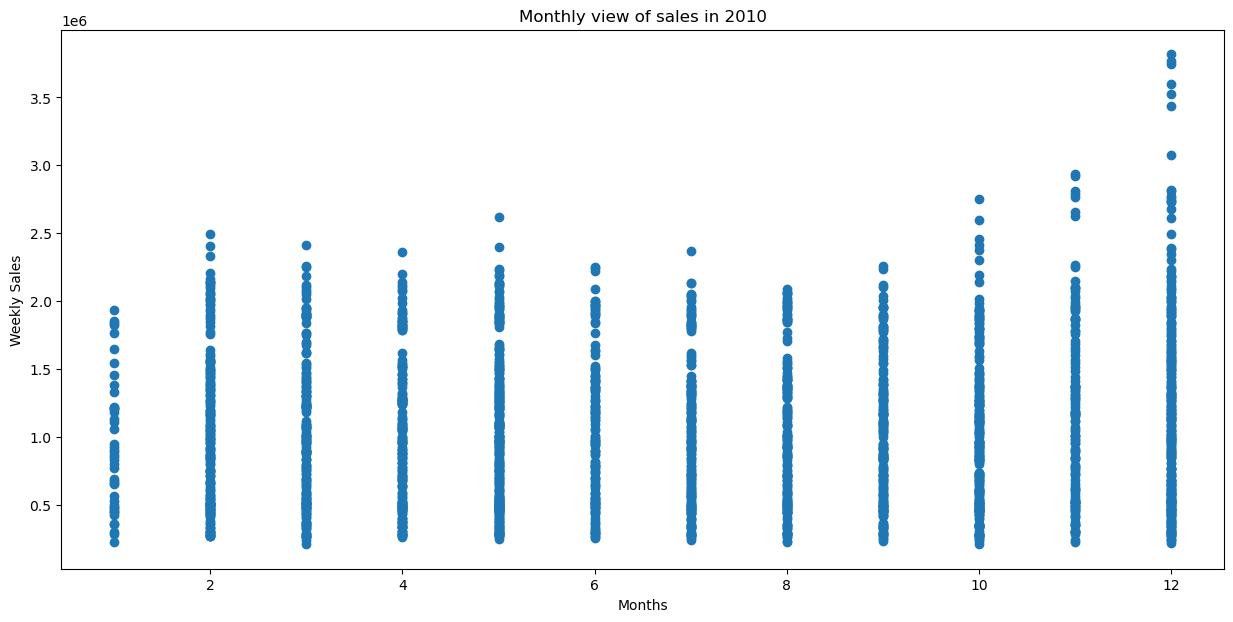

In [190]:
plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

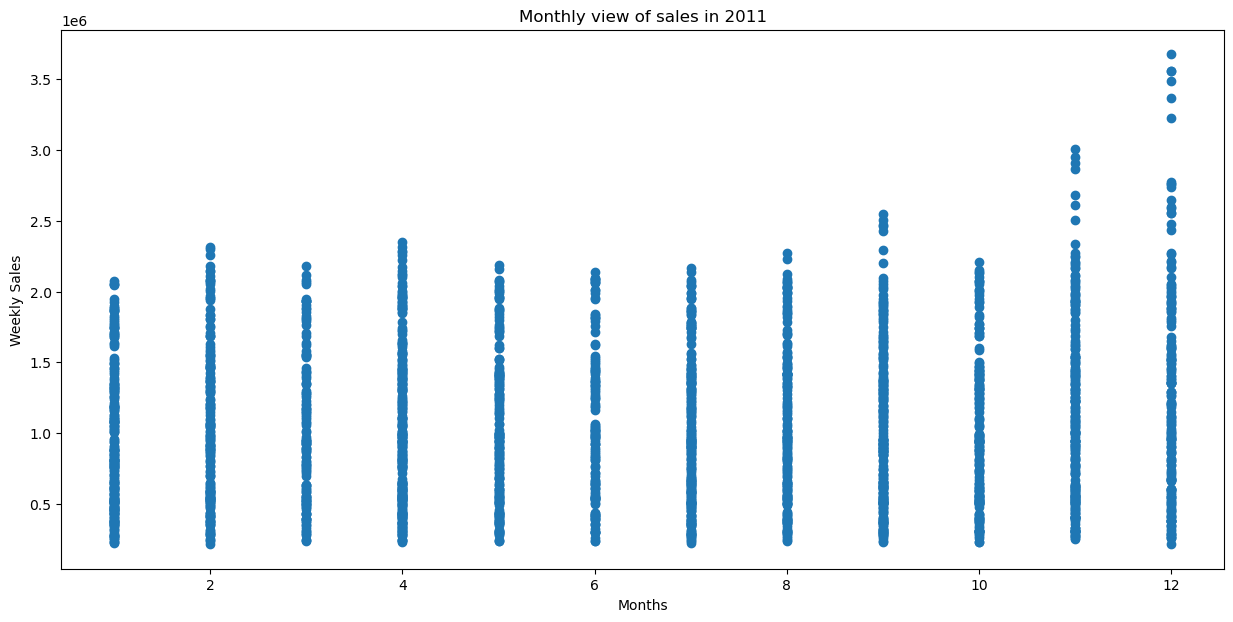

In [191]:
plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

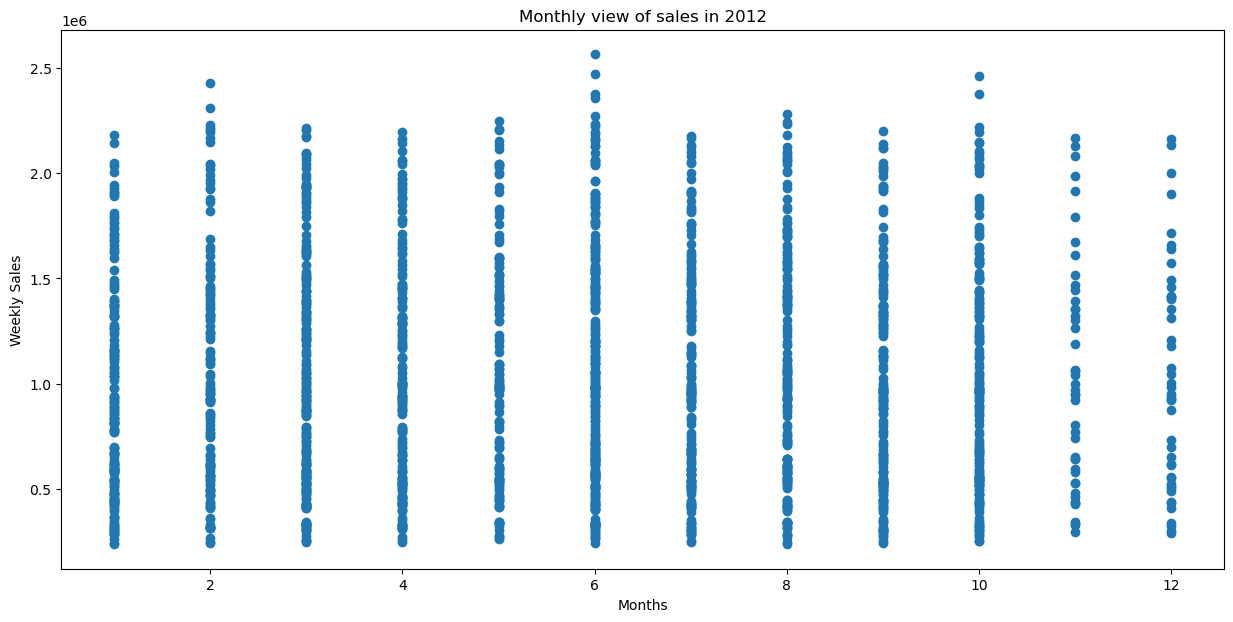

In [192]:
plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

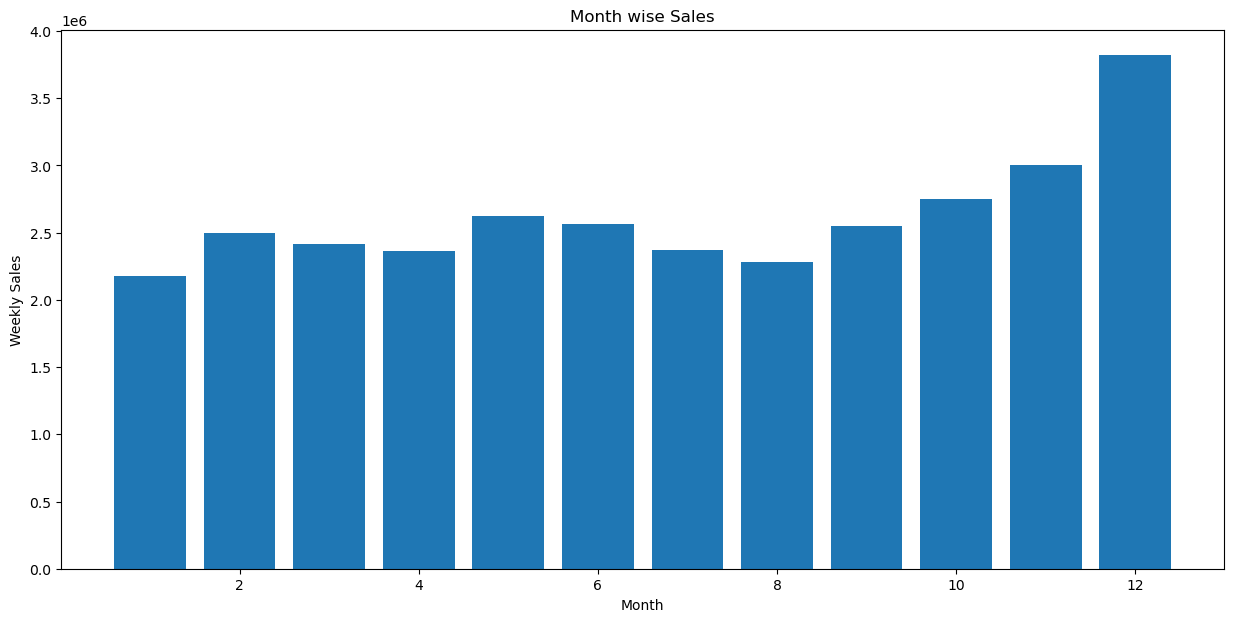

In [193]:
plt.figure(figsize=(15,7))
plt.bar(df['Month'],df['Weekly_Sales'])
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Month wise Sales')
plt.show()

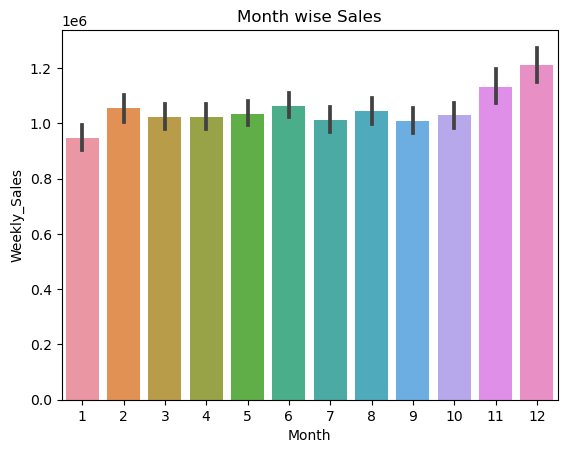

In [194]:
sns.barplot(x=df['Month'],y=df['Weekly_Sales'])
plt.title('Month wise Sales')
plt.show()

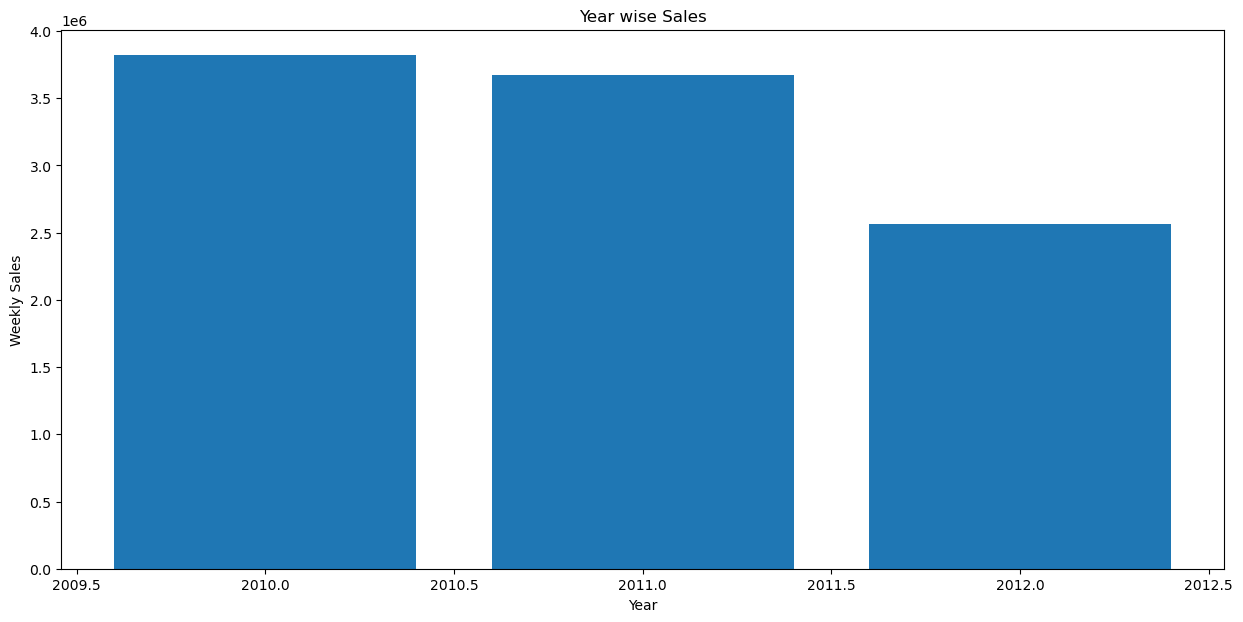

In [195]:
plt.figure(figsize=(15,7))
plt.bar(df['Year'],df['Weekly_Sales'])
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Year wise Sales')
plt.show()

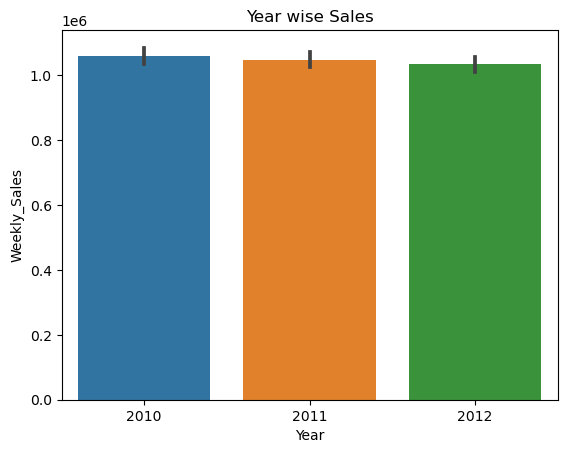

In [196]:
sns.barplot(x=df['Year'],y=df['Weekly_Sales'])
plt.title('Year wise Sales')
plt.show()

# 5. For Store 1 – Build  prediction models to forecast demand

1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

2. Change dates into days by creating new variable

### 5) 1) Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales

In [197]:
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

<AxesSubplot:xlabel='Temperature'>

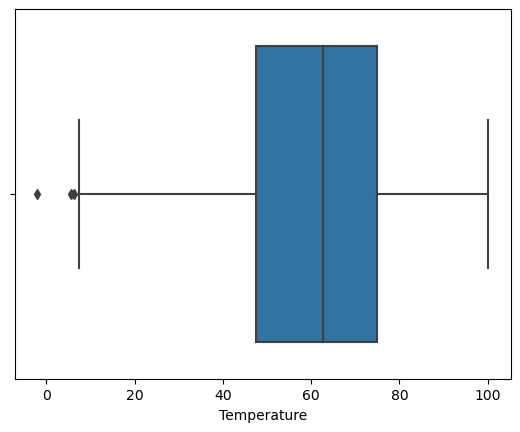

In [198]:
sns.boxplot(x['Temperature'])

<AxesSubplot:xlabel='Fuel_Price'>

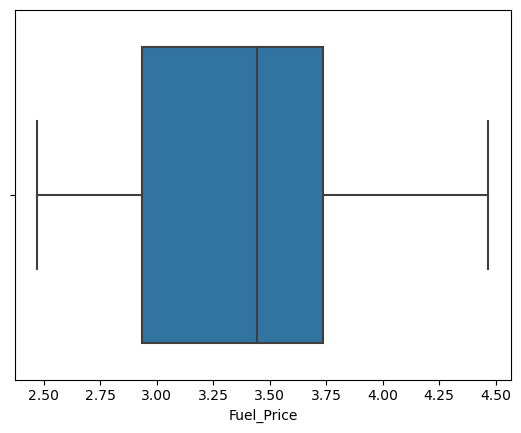

In [199]:
sns.boxplot(x['Fuel_Price'])

<AxesSubplot:xlabel='CPI'>

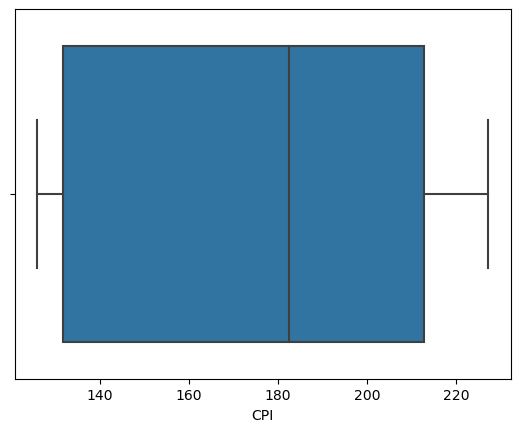

In [200]:
sns.boxplot(x['CPI'])

<AxesSubplot:xlabel='Unemployment'>

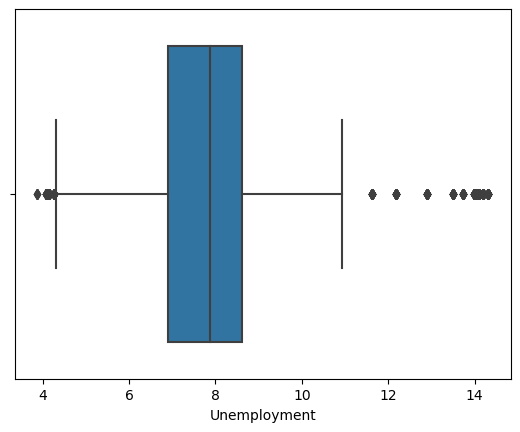

In [201]:
sns.boxplot(x['Unemployment'])

In [202]:
clean_data = df[(df['Unemployment']>4.5) & (df['Unemployment']<10) & (df['Temperature']>10)]

In [203]:
clean_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<AxesSubplot:xlabel='Temperature'>

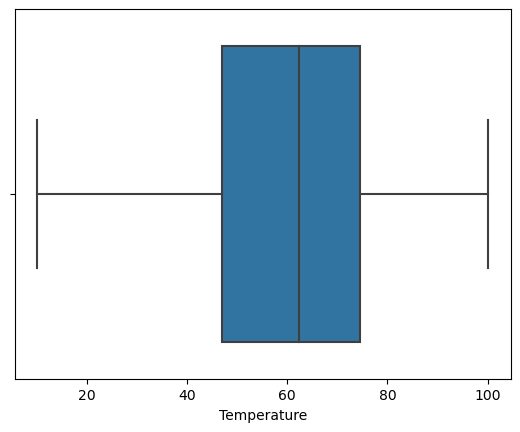

In [204]:
sns.boxplot(clean_data['Temperature'])

<AxesSubplot:xlabel='Fuel_Price'>

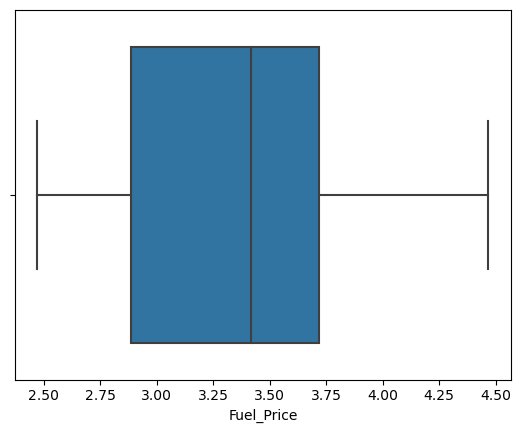

In [205]:
sns.boxplot(clean_data['Fuel_Price'])

<AxesSubplot:xlabel='CPI'>

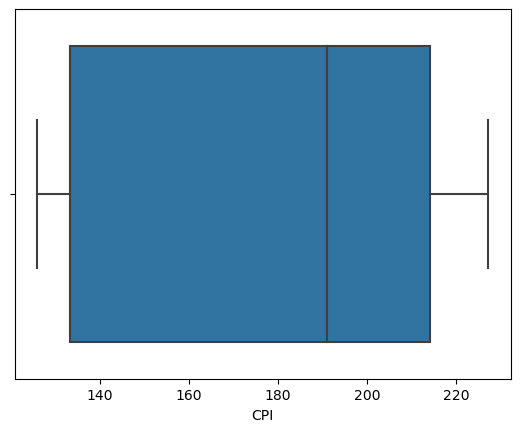

In [206]:
sns.boxplot(clean_data['CPI'])

<AxesSubplot:xlabel='Unemployment'>

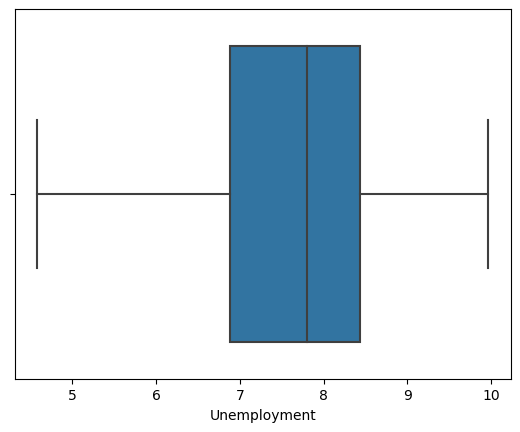

In [207]:
sns.boxplot(clean_data['Unemployment'])

In [208]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = clean_data[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = clean_data['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 13.211686177931515
Mean Absolute Error: 455020.5977995599
Mean Squared Error: 297972619443.4271
Root Mean Squared Error: 545868.6833327473


<AxesSubplot:ylabel='Weekly_Sales'>

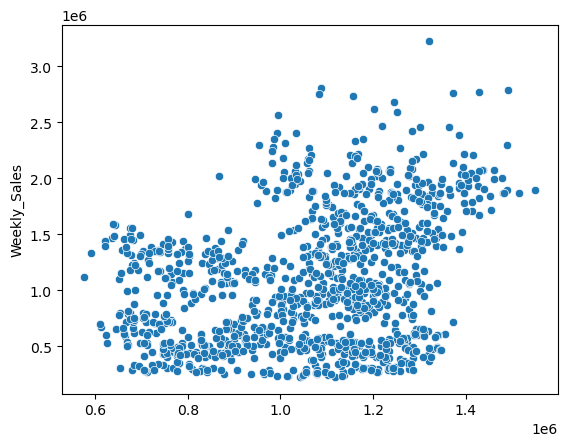

In [209]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

Random Forest Regressor:

Accuracy: 95.63354250352644
Mean Absolute Error: 68251.03058136045
Mean Squared Error: 14716278445.261433
Root Mean Squared Error: 121310.66913203237


<AxesSubplot:ylabel='Weekly_Sales'>

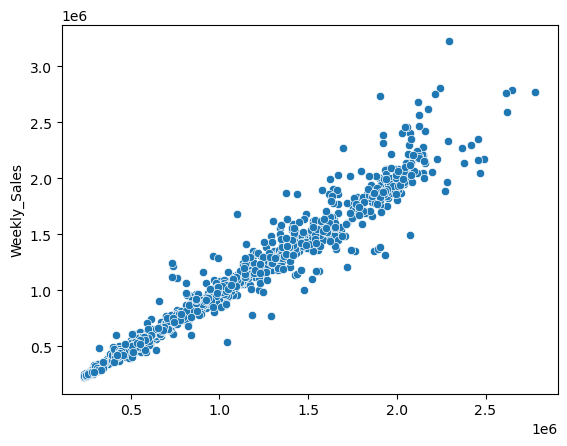

In [210]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

#### Here, Linear Regression is not an appropriate model to use which is clear from it's low accuracy. However, Random Forest Regression gives accuracy of over 95% , so, it is the best model to forecast demand.